# Introduction#

<img src="http://nommax.com/hp_sgp/assets/images/potterverse.jpg">

## Motivation ##

The initial motivation was to explore the Harry Potter universe, see how everyone is connected and try to find  way to predict the outcome of a 1 vs 1 duel beteen two random characters.

To deferentiate this project from the other Potterverse projects seen in the presentations, this one will be based on the characters' purity of blood and how they were connected, as it was the main factor based on which the villain of the series (you know who), created his army of Death Eaters, killed and terrorised the wizzarding world.

This happened mostly due to the fact that J.K. Rowling insparation for him who must not be named, was based on Adolf Hitler, Joseph Stalin and Benito Mussolini. The most notable similarity is that as Hitler had a vision of creating an Aryan "flawless" race, himself was far from flawless.  There are many obvious and hidden reasons for such obsessions, but as this is not a psychology project, it will be assumed that in Tom Riddle's case it was his hate towards his muggle father, whom he dispised and murdered along withthe rest of his mugle family.


### Purity of blood ###

**Why focus on it?**

The idea of "racial purity" pervades the entire series. Echoing the views of Salazar Slytherin, one of the founders of Hogwarts, who insisted that only pure-blooded descendants should be admitted to the school, Voldemort became obsessed that non-magical ancestry somehow taints the bloodline. Despite the fact that his father was a Muggle, he still considered himself as the heir of Salazar Slytherin.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

In [2]:
HP_Final = pd.read_excel (r'http://nommax.com/hp_sgp/files/HP_Final.xlsx')
HP_Final.head()

,Last_name,First_name,Family_affiliation,Hogwarts_house,Pure_blood,Member_of,Occupation_records,General_info
0,Abbott,Hannah,NaN,Hufflepuff,1.0,Dumbledore's Army,Student,Hufflepuff student in Harry Potter's year. Pre...
1,Avery,I,Avary family,Slytherin,1.0,Slug club,NaN,Member of Tom Riddle's gang when they attended...
2,Avery,II,Avary family,Slytherin,1.0,Death Eater,NaN,School friend of Severus Snape. After graduati...
3,Bagman,Ludo,NaN,NaN,NaN,NaN,Ministry of magic,Head of the Department of Magical Games and Sp...
4,Bagshot,Bathilda,NaN,NaN,NaN,NaN,NaN,"Author of A History of Magic, and the great au..."


### Cleaning up unnecessary data

In [3]:
HP_Final.drop(['Family_affiliation', 'Member_of', 'Occupation_records', 'General_info'], inplace=True, axis=1)
HP_Final.head()

,Last_name,First_name,Hogwarts_house,Pure_blood
0,Abbott,Hannah,Hufflepuff,1.0
1,Avery,I,Slytherin,1.0
2,Avery,II,Slytherin,1.0
3,Bagman,Ludo,NaN,NaN
4,Bagshot,Bathilda,NaN,NaN


## Basic Stats: ##

The data was scraped from various http://fandom.com/ wikis and wikipedia. The HP_final.xls file that is being used was cleaned with imputations and manual work as some information were controversial between the wiki pages. Furthermore, for defining the "Pure_blood" feature, only characters of human origin were kept. This means that some other important characters such Dobby the house elf, or "Fluffy", etc. were removed from the dataset.

The Pure_blood feature was turned into a boolean True/False value, instead of the original Pure-blood/Half-blood values that were scraped from the wikis. In that sence a the final version of the dataframe can be seen in the link right above.



### "Pure-bloods" vs "Mud-bloods" Stats###

In [4]:
pureBloods = 0
mudBloods = 0
unknownBlood = 0

for i in HP_Final['Pure_blood']:
    if (i == True):
        pureBloods += 1
    elif (i == False):
        mudBloods += 1
    else:
        unknownBlood +=1
        

print ('There are',pureBloods, 'known pure-bloods in the dataframe and', mudBloods, 'half-bloods. There are', unknownBlood, 'of unknown blood purity.')


There are 110 known pure-bloods in the dataframe and 99 half-bloods. There are 35 of unknown blood purity.


### Separating all canonical Pure-bloods ###



In [5]:
bloodType = HP_Final.groupby("Pure_blood")
bloodType.describe()

Last_name                      First_name                        \
               count unique      top freq      count unique       top freq   
Pure_blood                                                                   
0.0               99     60   Riddle    5         99     96    Justin    2   
1.0              110     58  Weasley   10        109    106  Euphemia    2   

           Hogwarts_house                          
                    count unique         top freq  
Pure_blood                                         
0.0                    48      5  Gryffindor   22  
1.0                    55      4   Slytherin   26

In [6]:
HP_Pures = pd.read_csv (r'http://nommax.com/hp_sgp/files/HP_Purina.csv')

Now that we found the pure bloods, let's see who they are.

In [7]:
HP_Pures

,Full_Name,Hogwarts_house,Pure_blood
0,Abbott Hannah,Hufflepuff,True
1,Avery I,Slytherin,True
2,Avery II,Slytherin,True
3,Barebone Credence,Unknown,True
4,Binns Cuthbert,Unknown,True
...,...,...,...
105,Weasley Ron,Gryffindor,True
106,Weasley Septimus,Gryffindor,True
107,Worple Eldred,Unknown,True
108,Yaxley Corban,Unknown,True


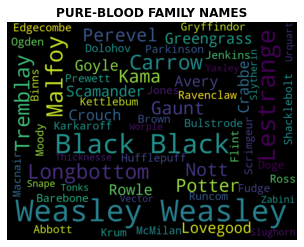

In [8]:
from wordcloud import WordCloud

text=("Abbott, Avery, Avery, Barebone, Binns, Black, Black, Black, Black, Black, Black, Black, Black, Brown, Bulstrode, Carrow, Carrow, Carrow, Carrow, Crabbe, Crabbe, Crouch, Crouch, Doge, Dolohov, Edgecombe, Flint, Fudge, Gaunt, Gaunt, Gaunt, Goyle, Goyle, Greengrass, Greengrass, Gryffindor, Hufflepuff, Jenkins, Jones, Kama, Kama, Kama, Karkaroff, Krum, Kettlebum, Lestrange, Lestrange, Lestrange, Lestrange, Lestrange, Lestrange, Longbottom, Longbottom, Longbottom, Longbottom, Lovegood, Lovegood, Macnair, Malfoy, Malfoy, Malfoy, Malfoy, Malfoy, McMilan, Moody, Nott, Nott, Nott, Ogden, Parkinson, Perevel, Perevel, Perevel, Potter, Potter, Potter, Prewett, Ravenclaw, Ross, Rowle, Rowle, Runcom, Scamander, Scamander, Scrimgeur, Shacklebolt, Slughorn, Slytherin, Snape, Thicknesse, Tonks, Tremblay, Tremblay, Tremblay, Tremblay, Urquart, Vector, Weasley, Weasley, Weasley, Weasley, Weasley, Weasley, Weasley, Weasley, Weasley, Weasley, Worple, Yaxley, Zabini")
 
# Creating the wordcloud object
wordcloud = WordCloud(width=1024, height=768, margin=0).generate(text)
 
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(str.upper("Pure-Blood Family Names"), fontweight = 'bold')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

### Some interesting facts: ###
- The most frequent Last name among known Pure-bloods is **Weasley**. But, they too are a just a brunch of the Black family.
- When it comes to Hogwarts students there are more Half-bloods than Pure-bloods, Salazar Slythering bones must be shaking in anger...
- Most Death Eaters are Pure-bloods and most Pure-bloods were in Slytherin house. Thus, it's safe to say that most Death Eaters were in Slytherin house when in Hogwarts.

## Graphs and analysis ##

The goal of the following network is to figure out how pure blood families are connected.

In [53]:
G = nx.Graph()

In [10]:
# Adding the nodes

PB_names = []

for i in HP_Pures['Full_Name']:
    PB_names.append(i)

PB_nn = tuple(PB_names)
 
for i in PB_nn:
    G.add_node(i)

PB_nn

('Abbott Hannah',
 'Avery I',
 'Avery II',
 'Barebone Credence',
 'Binns Cuthbert',
 'Black Arcturus',
 'Black Cedrella',
 'Black Irma',
 'Black Phineas Nigellus',
 'Black Pollux',
 'Black Regulus',
 'Black Sirius',
 'Black Walburga',
 'Brown Lavender',
 'Bulstrode Millicent',
 'Carrow Alecto',
 'Carrow Amycus',
 'Carrow Flora',
 'Carrow Hestia',
 'Crabbe Mr.',
 'Crabbe Vincent',
 'Crouch Bartemius Sr.',
 'Crouch Bartemius Jr.',
 'Doge Elphias',
 'Dolohov Antonin',
 'Edgecombe Marietta',
 'Flint Marcus',
 'Fudge Cornelius',
 'Gaunt Marvolo',
 'Gaunt Merope',
 'Gaunt Morfin',
 'Goyle Mr.',
 'Goyle Gregory',
 'Greengrass Astoria',
 'Greengrass Daphne',
 'Gryffindor Godric',
 'Hufflepuff Helga',
 'Jenkins Emily',
 'Jones Hestia',
 'Kama Laurena',
 'Kama Mustafa',
 'Kama Yusuf',
 'Karkaroff Igor',
 'Krum Viktor',
 'Kettlebum Silvanus',
 'Lestrange ',
 'Lestrange Bellatrix',
 'Lestrange Clarisse',
 'Lestrange Leta',
 'Lestrange Rabastan',
 'Lestrange Rodolfus',
 'Longbottom Alice',
 'Longbo

In [11]:
print('There are', G.number_of_nodes(), 'unique "Pure-blood" nodes.')

There are 110 unique "Pure-blood" nodes.


In [59]:
List1 = HP_Pures['Full_Name']
List2 = HP_Pures['Hogwarts_house']
List3 = Purina

G.add_nodes_from(List1)
G.add_nodes_from(List2)
edgeList = list(zip(List1, List2))
for item in List3:
    G.add_edges_from(edgeList, label = item)

In [63]:
print (nx.info(G))

Name: 
Type: Graph
Number of nodes: 115
Number of edges: 110
Average degree:   1.9130


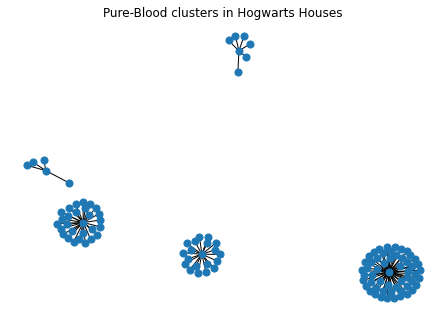

In [77]:
# color_map = []
# for node in G:
#     if node == 'Hufflepuff':
#         color_map.append('yellow')
#     elif node == 'Slytherin':
#         color_map.append('green')
#     elif node == 'Ravenclaw':
#         color_map.append('blue')
#     elif node == 'Gryffindor':
#         color_map.append('green')
        
positions = nx.spring_layout(G)
nx.draw(G, pos=nx.spring_layout(G), node_size = 50, with_labels=False)
plt.title('Pure-Blood clusters in Hogwarts Houses')
plt.show()

In the above graph we can see 5 networks. The Pure-blooded wizzards in the 4 Hogwarts Houses and the Unknown ones (who are the majority).

In [78]:
count = HP_Pures['Hogwarts_house'].value_counts() 
print(count) 

Unknown       54
Slytherin     27
Gryffindor    19
Hufflepuff     6
Ravenclaw      4
Name: Hogwarts_house, dtype: int64


## Result: 

Out of the 110 pure-bloods, we don't know which house the majority was sorted to, when in Hogwarts.
As expected,from the ones we know by the author, Slytherin is the house with the most pure-bloods.